# Pyber Ride Sharing
## Analysis

### 1) Nearly 97% of drivers operate in a city (77.8%) or suburban areas (19%).
### 2) Rural areas had the fewest rides but on the whole had highest average fares per ride.
### 3)Urban areas have the low average fares, but high ridership -- implying a strong correlation between average fare price and the total number of rides.

In [190]:
# Import Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
# Import file using os module. Verify file path exists

city_csv_filepath = os.path.join('raw_data', 'city_data.csv')
ride_csv_filepath = os.path.join('raw_data', 'ride_data.csv')

print(os.path.exists(city_csv_filepath))
print(os.path.exists(ride_csv_filepath))

True
True


In [192]:
# Read file with pandas. Create dataframe. Call .head() method

city_data_df = pd.read_csv(city_csv_filepath)

# city_data_df.head()

In [193]:
# Read file with pandas. Create dataframe. Call .head() method

ride_data_df = pd.read_csv(ride_csv_filepath)

# ride_data_df.head()

In [194]:
#merge

merged_rideshare_df = city_data_df.merge(ride_data_df, on = 'city')

# merged_rideshare_df.head()

In [195]:
# Group ride_data_df on city 

grouped_city_ride_data = merged_rideshare_df.groupby("city")

# grouped_city_ride_data.head()

In [196]:
# Find Average Fare ($) Per City

ave_fare_city = grouped_city_ride_data['fare'].mean()

# ave_fare_city

In [197]:
# Find Total Number of Rides Per City

ride_count_city = grouped_city_ride_data['ride_id'].count()

# ride_count_city

In [198]:
# Find Total Number of Drivers Per City
number_drivers_city = grouped_city_ride_data['driver_count'].mean()

# number_drivers_city

In [202]:
#Join ito New DataFrame. Issues merging. Workaround solved, but possible issue still..

city_analysis = pd.DataFrame.join(city_data_df, ride_count_city, on="city")
# city_analysis

city_analysis = pd.DataFrame.join(city_analysis, ave_fare_city, on="city")


city_analysis = pd.DataFrame.join(city_analysis, number_drivers_city, on="city", how='left', lsuffix='_left', rsuffix='_right')
# city_analysis

city_analysis_cleaned = city_analysis.drop(['driver_count_right'], axis=1)

city_analysis_cleaned.head()

In [204]:
#Relabel Column Names

city_analysis_cleaned.columns = ["City", "Driver Count", "Type of City", "Ride Count", "Average Fare"]

In [205]:
city_analysis_cleaned.head()

,City,Driver Count,Type of City,Ride Count,Average Fare
0,Kelseyland,63,Urban,28,21.806429
1,Nguyenbury,8,Urban,26,25.899615
2,East Douglas,12,Urban,22,26.169091
3,West Dawnfurt,34,Urban,29,22.330345
4,Rodriguezburgh,52,Urban,23,21.332609


In [206]:
#Create dataframes by city type

urban = city_analysis_cleaned[(city_analysis_cleaned['Type of City'] == "Urban")]

In [207]:
suburban = city_analysis_cleaned[(city_analysis_cleaned['Type of City'] == "Suburban")]                       

In [208]:
rural = city_analysis_cleaned[(city_analysis_cleaned['Type of City'] == "Rural")]

In [209]:
# Set Plot figure size
plt.figure(figsize=(10,8))
plt.figtext(.95, .5, "Note: \nCircle size corelates with driver count per city")

Text(0.95,0.5,'Note: \nCircle size corelates with driver count per city')

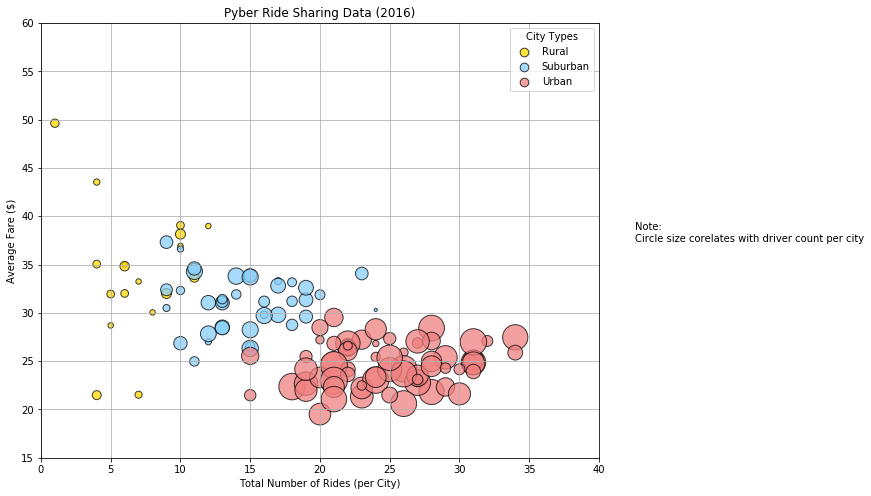

In [210]:
# Set plot figure size
plt.figure(figsize=(10,8))
plt.figtext(.95, .5, "Note: \nCircle size corelates with driver count per city")

# Plot by type
plt.scatter(rural["Ride Count"], rural["Average Fare"], marker="o", facecolors="gold", edgecolors="black", label="Rural", s=rural["Driver Count"]*10, alpha=0.75)
plt.scatter(suburban["Ride Count"], suburban["Average Fare"], marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban", s=suburban["Driver Count"]*10, alpha=0.75)
plt.scatter(urban["Ride Count"], urban["Average Fare"], marker="o", facecolors="lightcoral", edgecolors="black", label="Urban", s=urban["Driver Count"]*10, alpha=0.75)

# Add labels to the x and y axes 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Set your x and y limits
plt.xlim(0, 40)
plt.ylim(15, 60)


# Set a grid on plot and format legend# Set a  
plt.grid()
lgnd= plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

In [211]:
by_city_type = merged_rideshare_df.groupby('type')['fare', 'ride_id', 'driver_count']

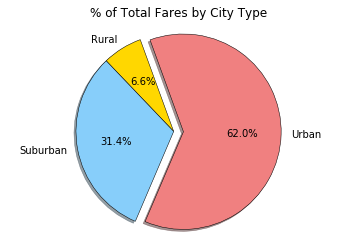

In [220]:
by_city_fare = by_city_type.sum()['fare']

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, .1]

plt.pie(by_city_fare, startangle = 110, colors = colors, labels = labels, explode=explode, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

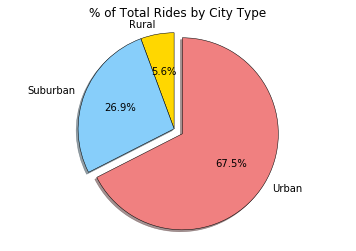

In [215]:
by_city_ride = by_city_type.sum()['ride_id']

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0 , .1]

plt.pie(by_city_ride, startangle = 110, colors = colors, labels = labels, explode = explode, autopct = "%1.2f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()



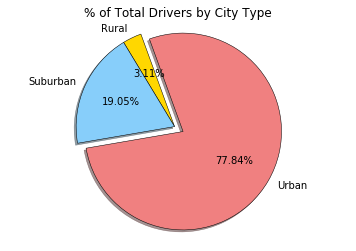

In [219]:
by_city_driver = city_data_df.groupby('type').sum()['driver_count']

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .1]

plt.pie(by_city_driver, startangle = 110 , colors = colors, labels = labels, explode = explode,  autopct = "%1.2f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
